In [21]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf



In [22]:
# Si hay GPU
GPU=False


if GPU:
  nombre_equipo=tf.test.gpu_device_name()
  if nombre_equipo !='/device:GPU:0':
    raise SyntaxError('Dispositivo GPU no encontrado')
  print(f'Encontre la GPU en:  {nombre_equipo}')



# Ejercicio: Entrenar una red convolucional para el siguiente dataset.

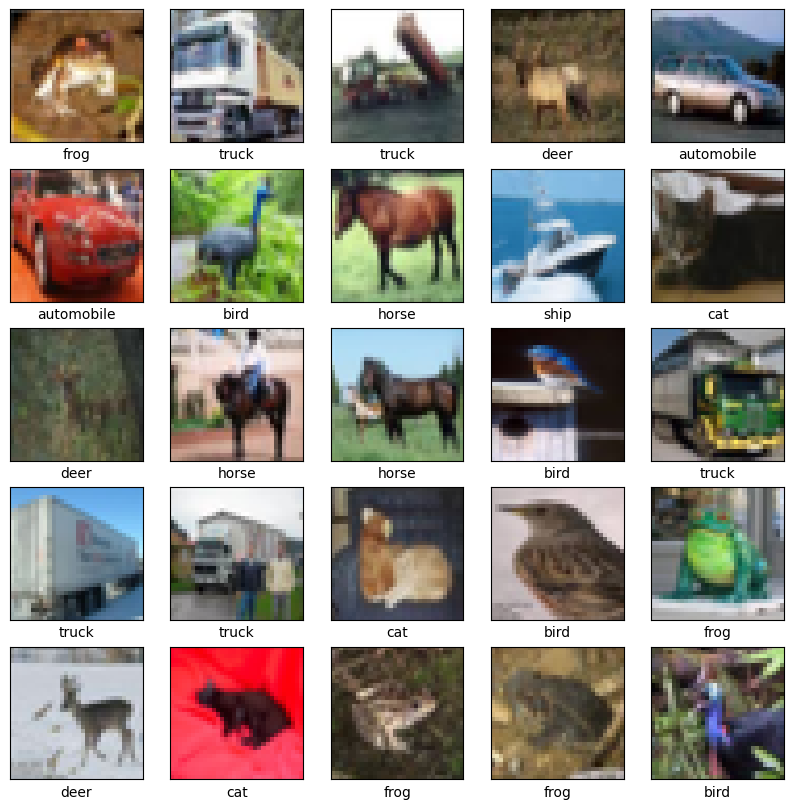

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

# Mostrar algunas imágenes con sus etiquetas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Aumento de datos (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Modelo CNN mejorado
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compilar el modelo con una tasa de aprendizaje ajustada y usar ReduceLROnPlateau
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
# Callbacks: EarlyStopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [28]:
# Entrenar el modelo con data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.2088 - loss: 2.0550 - val_accuracy: 0.4396 - val_loss: 1.5492 - learning_rate: 5.0000e-04
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.4269 - loss: 1.5448 - val_accuracy: 0.5390 - val_loss: 1.2439 - learning_rate: 5.0000e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5071 - loss: 1.3613 - val_accuracy: 0.5837 - val_loss: 1.1619 - learning_rate: 5.0000e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5534 - loss: 1.2547 - val_accuracy: 0.6394 - val_loss: 1.0307 - learning_rate: 5.0000e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5794 - loss: 1.1857 - val_accuracy: 0.6405 - val_loss: 1.0275 - learning_rate: 5.0000e-04
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.6095 - loss: 1.1074 - val_accuracy: 0.6810 - val_loss: 0.9288 - learning_rate: 5.0000e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/ste

In [29]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7638 - loss: 0.6964

Test accuracy: 0.7638000249862671


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


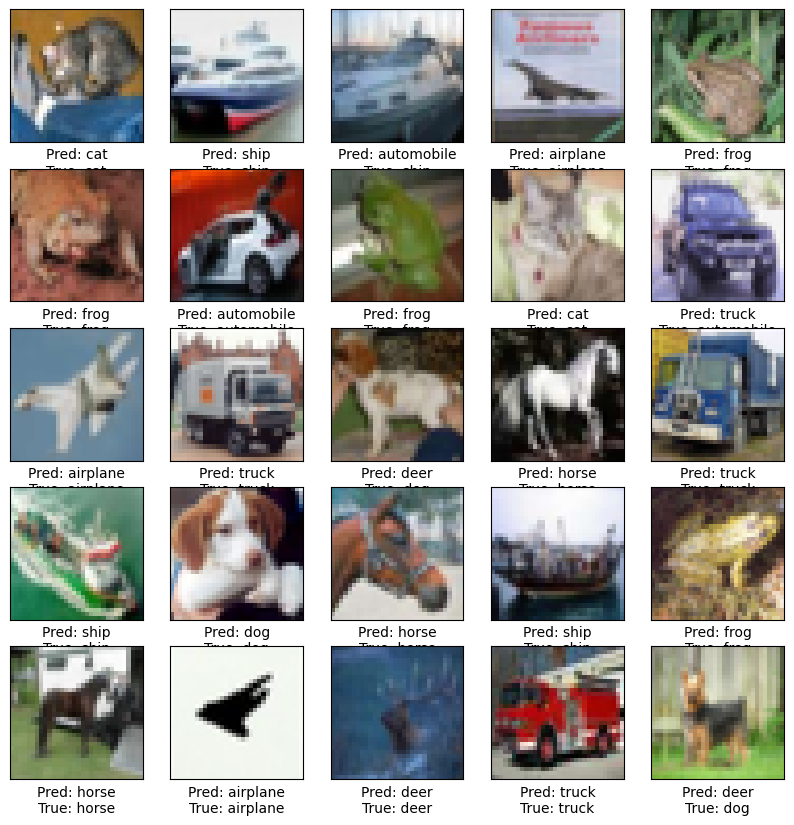

In [30]:
# Mostrar algunas predicciones
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    predicted_label = class_names[tf.argmax(model.predict(X_test[i:i+1]), axis=1).numpy()[0]]
    true_label = class_names[y_test[i]]
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}")
plt.show()